In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import tensorflow as tf

weather_data = pd.read_csv(r'D:/CSU/Winter 2021/CSC510 - Foundations of Artificial Intelligence/Portfolio Project/Data/simplemaps_uszips_basicv1.79/climate_data_for_US/combined_climate_data_1980_2021.csv', index_col=0)

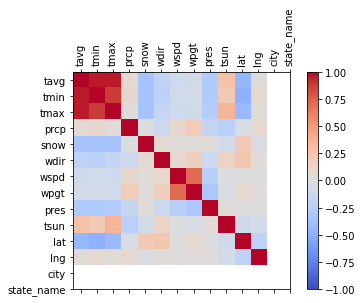

In [2]:
'''find correlation between variables. Our target variable is tavg
    .corr() is the function that will produce a correlation table 
    then we can plot this out in matplotlib. The dark red means positive strong correlation
    and the dark blue mean negative strong correlation. The diagonal line only means the intersection
    of an attribute with itself.
'''
corr = weather_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(weather_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(weather_data.columns)
ax.set_yticklabels(weather_data.columns)
plt.show()



In [11]:
'''clean and prepare data'''
#weather_data

''' we need to first only get the columns that are correlated to our target variable (tavg).
These variables will be tavg, tmin, tmax, prcp, wdir, wspd,wpgt, pres, tsun'''

weather_data_num_variables = weather_data[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']]
weather_data_num_variables

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,
2006-01-01,-0.4,-1.0,0.0,NaN,66.0,17.9,NaN,NaN,NaN
2006-01-02,-1.2,-1.0,0.0,NaN,NaN,14.0,NaN,NaN,NaN
2006-01-03,-0.1,-1.0,2.0,NaN,144.3,16.3,NaN,NaN,NaN
2006-01-04,2.1,1.0,5.0,NaN,296.7,25.1,NaN,NaN,NaN
2006-01-05,-1.8,-1.0,1.0,NaN,NaN,17.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-27,27.5,26.1,30.0,0.0,59.6,22.0,NaN,1013.0,NaN
2021-12-28,27.2,25.0,30.0,0.0,49.6,24.5,NaN,1013.5,NaN
2021-12-29,27.8,25.6,30.6,0.3,68.8,26.6,NaN,1013.2,NaN


In [12]:
'''next we'll need to replace all NaN values with the average value in that column. There are several methods I might
try here but this is the first and we'll evaluate the result. Another idea I want to try is to omit all rows that 
have NaN values and use that dataset to predict then use those values to replace NaN values in the original dataset'''

# find where there are nulls
weather_data_num_variables.tavg.isna().sum()

3659209

In [5]:
for column in weather_data_num_variables.columns:
    print(column)
    print(weather_data_num_variables[column].mean())

tavg
13.423049192850371
tmin
9.065401380393482
tmax
17.64878932049288
prcp
2.536188545982376
wdir
190.89874263331163
wspd
12.362538236740093
wpgt
37.60200043056173
pres
1016.7164620925539
tsun
376.7633479218932


In [13]:
# we need to change the wspd and wdir to a vector in radians
wv2 = 12.362538236740093 # wind speed avg

# Convert to radians.
wd_rad2 = 190.89874263331163*np.pi / 180

# Calculate the wind x and y components.
print("Wdirx ", wv2*np.cos(wd_rad2))
print("Wdiry ", wv2*np.sin(wd_rad2))

Wdirx  -12.139553430946346
Wdiry  -2.33743324012893


In [91]:
'''for final result, get the mean and std for the entire dataset'''
print("mean: ", weather_data_num_variables.mean())
print("std: ", weather_data_num_variables.std())

mean:  tavg       13.422551
tmin        9.065861
tmax       17.648910
prcp        2.537287
wpgt       37.600377
pres     1016.717636
tsun      376.760661
Wdirx      -6.785223
Wdiry      -2.049101
dtype: float64
std:  tavg       9.755067
tmin       9.579630
tmax      11.366932
prcp       7.297453
wpgt       6.230176
pres       5.681073
tsun     129.557027
Wdirx      9.348482
Wdiry      7.025097
dtype: float64


In [14]:
# find the mean for each column and replace the NaN's using the fillna() method
# then check the results using the isna() and sum() methods

for column in weather_data_num_variables.columns:
    weather_data_num_variables[column] = weather_data_num_variables[column].fillna(round(weather_data_num_variables[column].mean(), 2))

weather_data_num_variables.isna().sum()

C:\Users\danny\AppData\Local\Temp/ipykernel_15956/943630123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables[column] = weather_data_num_variables[column].fillna(round(weather_data_num_variables[column].mean(), 2))


tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
tsun    0
dtype: int64

In [15]:
# check for outliers
weather_data_num_variables.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tavg,22392724.0,13.422551,9.755067,-59.0,7.50,13.42,20.90,48.8
tmin,22392724.0,9.065861,9.579630,-61.1,1.10,10.00,16.10,47.0
tmax,22392724.0,17.648910,11.366932,-97.0,9.00,17.65,27.20,94.0
prcp,22392724.0,2.537287,7.297453,0.0,0.00,0.30,2.54,4790.4
wdir,22392724.0,190.899577,60.326792,0.0,190.90,190.90,190.90,360.0
wspd,22392724.0,12.362140,5.844798,0.0,8.60,12.36,14.90,160.9
wpgt,22392724.0,37.600377,6.230176,0.0,37.60,37.60,37.60,475.2
pres,22392724.0,1016.717636,5.681073,905.7,1014.70,1016.72,1018.50,1065.3
tsun,22392724.0,376.760661,129.557027,0.0,376.76,376.76,376.76,1422.0


In [16]:
'''
    the wind speed column is in degrees. For models to make use of the wspd columns, we'll need to convert it to a vector 
'''

wv = weather_data_num_variables.pop('wspd')

# Convert to radians.
wd_rad = weather_data_num_variables.pop('wdir')*np.pi / 180

# Calculate the wind x and y components.
weather_data_num_variables['Wdirx'] = wv*np.cos(wd_rad)
weather_data_num_variables['Wdiry'] = wv*np.sin(wd_rad)



C:\Users\danny\AppData\Local\Temp/ipykernel_15956/925395456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables['Wdirx'] = wv*np.cos(wd_rad)
C:\Users\danny\AppData\Local\Temp/ipykernel_15956/925395456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables['Wdiry'] = wv*np.sin(wd_rad)


In [90]:
weather_data_num_variables

,tavg,tmin,tmax,prcp,wpgt,pres,tsun,Wdirx,Wdiry
time,,,,,,,,,
2006-01-01,-0.4,-1.0,0.0,2.54,37.6,1016.72,376.76,7.280586,16.352464
2006-01-02,-1.2,-1.0,0.0,2.54,37.6,1016.72,376.76,-13.747422,-2.647336
2006-01-03,-0.1,-1.0,2.0,2.54,37.6,1016.72,376.76,-13.236961,9.511722
2006-01-04,2.1,1.0,5.0,2.54,37.6,1016.72,376.76,11.277907,-22.423622
2006-01-05,-1.8,-1.0,1.0,2.54,37.6,1016.72,376.76,-17.282473,-3.328080
...,...,...,...,...,...,...,...,...,...
2021-12-27,27.5,26.1,30.0,0.00,37.6,1013.00,376.76,11.132743,18.975301
2021-12-28,27.2,25.0,30.0,0.00,37.6,1013.50,376.76,15.878938,18.657689
2021-12-29,27.8,25.6,30.6,0.30,37.6,1013.20,376.76,9.619214,24.799813


### Split data

In [103]:
''' Now we can split data. Then we'll want to normalize it. We're going to use a pretty 
standard set split which is 70% train, 20% validate, 10% test'''

column_indices = {name: i for i, name in enumerate(weather_data_num_variables.columns)}

n = len(weather_data_num_variables)
train_df = weather_data_num_variables[0:int(n*0.7)]
val_df = weather_data_num_variables[int(n*0.7):int(n*0.9)]
test_df = weather_data_num_variables[int(n*0.9):]


num_features = weather_data_num_variables.shape[1]

In [104]:
val_df

,tavg,tmin,tmax,prcp,wpgt,pres,tsun,Wdirx,Wdiry
time,,,,,,,,,
2016-02-13,18.00,11.10,24.40,0.00,37.6,1023.20,376.76,7.743712,-9.427350
2016-02-14,18.70,12.80,22.80,0.00,37.6,1022.50,376.76,13.509301,11.743457
2016-02-15,22.00,20.60,23.30,0.00,37.6,1018.10,376.76,-8.237596,23.391922
2016-02-16,22.80,17.80,26.10,40.60,37.6,1013.00,376.76,-13.943814,-2.685155
2016-02-17,20.00,16.10,25.00,0.00,37.6,1019.20,376.76,9.190267,-2.774705
...,...,...,...,...,...,...,...,...,...
2019-10-01,13.42,9.07,17.65,2.54,37.6,1016.72,376.76,-12.137010,-2.337220
2019-10-02,13.42,9.07,17.65,2.54,37.6,1016.72,376.76,-12.137010,-2.337220
2019-10-03,13.42,9.07,17.65,2.54,37.6,1016.72,376.76,-12.137010,-2.337220


### Normalize the data

In [105]:
''' for the test set we will scale the data. I'll be using Normalization to do this.
    Basically, normalization is taking a value and subtracting the mean and divide by the standard deviation. '''
    
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


## Windowing. Create a class for windows. Tensorflow documentation and other documentation is very helpful making sense of windowing

#### We need to create windows that take input and label data. If we're predicting a day in the future, we can used windows to use 5 days worth of data, etc.

In [106]:
'''
We will make use of creating a class WindowGenerator that will take in labels and width for the train, 
validate and test sets. This makes our sets reusable and is good practice when working with Deep Learning models
such as RNN
'''

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [107]:
  '''The split_window function will split our data into inputs and labels'''
  def split_window(self, features):
    inputs = features[:, self.input_slice]
    labels = features[:, self.labels_slice]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, self.column_indices[name]] for name in self.label_columns], 
            axis = -1
            )

    return inputs, labels

WindowGenerator.split_window = split_window

In [108]:
'''
The below instance creates a learning input of 50 days to predict the average temperature (tavg)
 of one day. The label_width represents that a label is 1 day. We can (and will) add more columns to the
 label_colums argument
'''
w1 = WindowGenerator(input_width=50,label_width=1,shift=1, label_columns=['tavg'])

w1

Total window size: 51
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Label indices: [50]
Label column name(s): ['tavg']

In [ ]:
w2 = WindowGenerator(input_width=9, label_width=9, shift=1,
                     label_columns=['tavg', 'tmin', 'tmax', 'prcp', 'wpgt', 'pres', 'tsun', 'Wdirx', 'Wdiry'])
w2


In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

### Create tf.data.Datasets for standard reuse of datasets in different models

In [109]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


In [110]:
# Create attributes within window generator to access the train, validate, and test datasets  

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example


# Create the model

### We will be using a LSTM recurrent neural network

In [115]:
'''
Make a window. we'll use 31 to start off with which will be 9 days in a step at a time 
'''

weather_window = WindowGenerator(
    input_width=9, label_width=9, shift=9,
    label_columns=['tavg', 'tmin', 'tmax', 'prcp', 'wpgt', 'pres', 'tsun', 'Wdirx', 'Wdiry'])

weather_window

Total window size: 18
Input indices: [0 1 2 3 4 5 6 7 8]
Label indices: [ 9 10 11 12 13 14 15 16 17]
Label column name(s): ['tavg', 'tmin', 'tmax', 'prcp', 'wpgt', 'pres', 'tsun', 'Wdirx', 'Wdiry']

In [121]:
'''
To start, I'll be making use of the long short term memory model since recurrent neural networks are good for 
time series data
'''

weather_lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=9)
])


In [122]:
print('Input shape:', weather_window.example[0].shape)
print('Output shape:', weather_lstm_model(weather_window.example[0]).shape)


Input shape: (32, 9, 9)
Output shape: (32, 9, 9)


In [123]:
'''
train the model. In the tensorflow tutorial, compile_and_fit is a function 
that stores the training procedure. This is the route that I'll take, as well,
as I'll test other models too.
'''

MAX_EPOCHS = 1

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  # optimizers are MAE & Adam
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

val_performance = {}
performance = {}



'''
Run the LSTM. we're maxing the epochs to two since the dataset is very large and the MAE gets very small after just one epoch
'''

history = compile_and_fit(weather_lstm_model, weather_window)

val_performance['LSTM'] = weather_lstm_model.evaluate(weather_window.val)
performance['LSTM'] = weather_lstm_model.evaluate(weather_window.test, verbose=0)


139954/139954 [==============================] - 157s 1ms/step - loss: 0.8178 - mean_absolute_error: 0.4856


In [125]:

'''
taken from tensorflow docs is a plot method for the WindowGenerator class
'''

def plot(self, model=None, plot_col='tavg', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [D]')

WindowGenerator.plot = plot

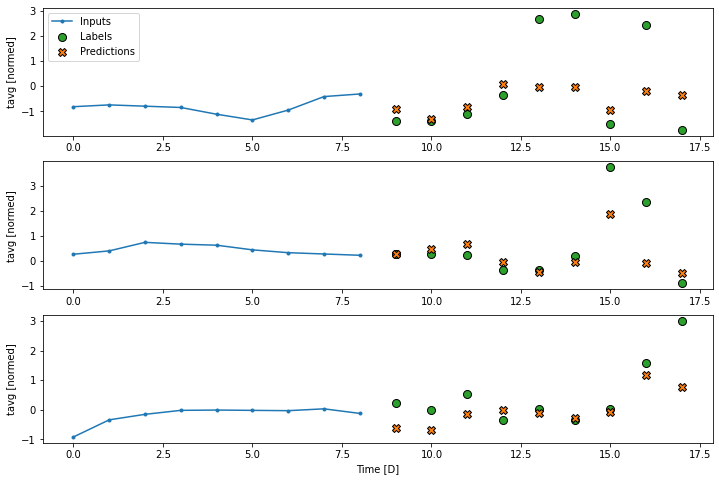

In [126]:
weather_window.plot(weather_lstm_model)

## Save the model after its been trained

In [127]:
'''
save the model as and .h5 file and .json
'''

from keras.models import load_model
    
weather_lstm_model.save('D:/CSU/Winter 2021/CSC510 - Foundations of Artificial Intelligence/Portfolio Project/Code/my_model4.h5')  # creates a HDF5 file 'my_model.h5'
# del model # deletes the existing model
    
# # returns a compiled model
# # identical to the previous one
# model = load_model('my_model.h5')

# save as JSON
#json_string = weather_lstm_model.to_json()


# # load the model again
# # model reconstruction from JSON:
# from keras.models import model_from_json
# model = model_from_json(json_string)
    
# # model reconstruction from YAML:
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

# # if we just want to store weights
# '''model.save_weights('my_model_weights.h5')  # to store
# model.load_weights('my_model_weights.h5')  # to load'''

In [43]:
# returns a compiled model
# identical to the previous one
weather_loaded_lstm_model = load_model('D:/CSU/Winter 2021/CSC510 - Foundations of Artificial Intelligence/Portfolio Project/Code/my_model2.h5')

In [44]:
weather_loaded_lstm_model